Ficha 3 - Integração e Diferenciação Numérica

In [26]:
from numpy import sin, cos, tan, pi, e, exp, copy, linspace
from sympy import pprint, Symbol
from numpy.polynomial.legendre import leggauss

In [2]:
gauss_legendre_n_list = [2, 4, 8, 10, 20, 30, 50, 100, 500, 1000]

In [3]:
x = Symbol('x')
y = Symbol('y')
f1 = lambda x: sin(x)
f2 = lambda x: exp(x) * cos(x)
num
f1_sol = 2
f2_sol = -(exp(pi) + 1) / 2

In [4]:
trapezios_simples = lambda f, a, b: (b-a)/2 * (f(a) + f(b))
simpson13_simples = lambda f, a, b: (b-a)/3 * (f(a) + 4*f((a + b)/2) + f(b))
simpson38_simples = lambda f, a, b: (3/8)*(b-a) * (f(a) + 3*f((2*a + b)/3) + 3*f((a + 2*b)/3) + f(b))

In [5]:
def trapezios_composta(f, a, b, n):
h = (b-a)/n
xi = a
s_int = 0
for i in range(n):
s_int += f(xi) + f(xi+h)
xi += h
s_int *= h/2
return s_int


def simpson13_composta(f, a, b, n):
h = (b-a)/n
x = linspace(a, b, n+1)
s_int = 0
for i in range(0, n, 2):
s_int += f(x[i]) + 4*f(x[i+1]) + f(x[i+2])
s_int *= h/3
return s_int

In [6]:
def gausslegendre(f, x_pts, w_pts):
x_gl = copy(x_pts)
w_gl = copy(w_pts)
s_int = 0
for x, w in zip(x_gl, w_gl):
s_int += w * f(x)
return s_int


def gauss_legendre_ab(f, a, b, x_pts, w_pts):
w_gl_ab = copy(w_pts)
x_gl_ab = copy(x_pts)
h = (b-a)/2
s_int = 0
for x, w in zip(x_gl_ab, w_gl_ab):
s_int += w * f(h * (x + 1) + a)
s_int *= h
return s_int
# x_gl_ab = list(map(lambda x: -1 + 2*(x-a)/(b-a), copy(x_pts)))
# return gausslegendre(f, x_gl_ab, w_pts)


def gauss_legendre_0inf(f, x_pts, w_pts):
x_gl_0inf = list(map(lambda x: tan( pi/4 * (1+x)), copy(x_pts)))
w_gl_0inf = list(map(lambda w, x: pi/4 * w/(cos(pi/4 * (1+x)))**2, copy(w_pts), copy(x_pts)))
return gausslegendre(f, x_gl_0inf, w_gl_0inf)

In [7]:
def erro_rel(est, real): return abs((est-real)/real) * 100

def aval_simples(f, a, b, real_value):
print('Utilizando o método:')
trap_si = trapezios_simples(f, a, b)
print('Trapézio Simples: ' + str(trap_si) + '   Erro Relativo: ' + str(erro_rel(trap_si, real_value)) + ' %')

simps13_si = simpson13_simples(f, a, b)
print('Simpson 1/3 Simples: ' + str(simps13_si) + '   Erro Relativo: ' + str(erro_rel(simps13_si, real_value)) + ' %')

simps38_si =  simpson38_simples(f, a, b)
print('Simpson 3/8 Simples: ' + str(simps38_si) + '   Erro Relativo: ' + str(erro_rel(simps38_si, real_value)) + ' %')


In [8]:
def aval_composta(f, a, b, n, x_n, w_n, real_value):
print('Utilizando os métodos: [N = ' + str(n) + '] \n')

trap_c = trapezios_composta(f, a, b, n)
print('Trapézios Composta: ' + str(trap_c) + '   Erro Relativo: ' + str(erro_rel(trap_c, real_value)))

simp_13_c = simpson13_composta(f, a, b, n)
print('Simpson Composta: ' + str(simp_13_c) + '   Erro Relativo: ' + str(erro_rel(simp_13_c, real_value)))

gaule_ab = gauss_legendre_ab(f, a, b, x_n, w_n)
print('Gauss-Legendre: ' + str(gaule_ab) + '   Erro Relativo: ' + str(erro_rel(gaule_ab, real_value)))
print('\n')

Integrando $\sin (x)$

In [9]:
aval_simples(f1, 0, pi, f1_sol)

Utilizando o método:
Trapézio Simples: 1.92367069372e-16   Erro Relativo: 100.0 %
Simpson 1/3 Simples: 4.18879020479   Erro Relativo: 109.439510239 %
Simpson 3/8 Simples: 6.12157285429   Erro Relativo: 206.078642715 %


In [10]:
for n in gauss_legendre_n_list:
x_i, w_i = leggauss(n)
aval_composta(f1, 0, pi, n, x_i, w_i, f1_sol)

Utilizando os métodos: [N = 2] 

Trapézios Composta: 1.57079632679   Erro Relativo: 21.4601836603
Simpson Composta: 2.09439510239   Erro Relativo: 4.71975511966
Gauss-Legendre: 1.93581957465   Erro Relativo: 3.20902126744


Utilizando os métodos: [N = 4] 

Trapézios Composta: 1.89611889794   Erro Relativo: 5.19405510315
Simpson Composta: 2.00455975498   Erro Relativo: 0.227987749221
Gauss-Legendre: 1.99998422846   Erro Relativo: 0.000788577113897


Utilizando os métodos: [N = 8] 

Trapézios Composta: 1.97423160195   Erro Relativo: 1.28841990272
Simpson Composta: 2.00026916995   Erro Relativo: 0.0134584974194
Gauss-Legendre: 2.0   Erro Relativo: 2.77555756156e-13


Utilizando os métodos: [N = 10] 

Trapézios Composta: 1.98352353751   Erro Relativo: 0.823823124527
Simpson Composta: 2.00010951732   Erro Relativo: 0.00547586575022
Gauss-Legendre: 2.0   Erro Relativo: 2.22044604925e-14


Utilizando os métodos: [N = 20] 

Trapézios Composta: 1.99588597271   Erro Relativo: 0.205701364564
Simp


Trapézios Composta: 1.99999835507   Erro Relativo: 8.22467155936e-05
Simpson Composta: 2.0   Erro Relativo: 5.40456568388e-11
Gauss-Legendre: 2.0   Erro Relativo: 9.96980276113e-12




Integrando $e^{x} \cos (x)$

In [11]:
aval_simples(f2, 0, pi, f2_sol)

Utilizando o método:
Trapézio Simples: -34.7785186603   Erro Relativo: 188.131903996 %
Simpson 1/3 Simples: -23.1856791068   Erro Relativo: 92.087935997 %
Simpson 3/8 Simples: -35.3982912992   Erro Relativo: 193.266575551 %


In [12]:
for n in gauss_legendre_n_list:
x_i, w_i = leggauss(n)
aval_composta(f2, 0, pi, n, x_i, w_i, f2_sol)

Utilizando os métodos: [N = 2] 

Trapézios Composta: -17.3892593301   Erro Relativo: 44.0659519978
Simpson Composta: -11.5928395534   Erro Relativo: 3.9560320015
Gauss-Legendre: -12.3362104657   Erro Relativo: 2.20262237998


Utilizando os métodos: [N = 4] 

Trapézios Composta: -13.3360228474   Erro Relativo: 10.4858344393
Simpson Composta: -11.9849440198   Erro Relativo: 0.707538080238
Gauss-Legendre: -12.0701894903   Erro Relativo: 0.00129926756839


Utilizando os métodos: [N = 8] 

Trapézios Composta: -12.3821624298   Erro Relativo: 2.58332366937
Simpson Composta: -12.0642089572   Erro Relativo: 0.0508465872629
Gauss-Legendre: -12.0703463164   Erro Relativo: 3.31125784123e-12


Utilizando os métodos: [N = 10] 

Trapézios Composta: -12.2695456708   Erro Relativo: 1.65032012456
Simpson Composta: -12.0677961579   Erro Relativo: 0.0211274672189
Gauss-Legendre: -12.0703463164   Erro Relativo: 5.88668060663e-14


Utilizando os métodos: [N = 20] 

Trapézios Composta: -12.1200244031   Erro 


Trapézios Composta: -12.0703661713   Erro Relativo: 0.000164493456883
Simpson Composta: -12.0703463164   Erro Relativo: 2.163943791e-10
Gauss-Legendre: -12.0703463164   Erro Relativo: 1.88520946427e-11




In [13]:
xi, wi = leggauss(20)

### Calcular o integral: ###

$\int _{0}^{\infty} \frac{x dx}{(1+x)^{4}}$

In [14]:
f3 = lambda x: x / (1+x)**4
gauss_legendre_0inf(f3, xi, wi)

0.16666666666666655

Usando a transformação

$x = \frac{y}{1-y}$

In [0]:
f3_1 = lambda y: f3(y/(1-y))

In [0]:
import matplotlib.pyplot as pl
import numpy as np
%matplotlib inline

In [43]:
gauss_legendre_0inf(f3_1, xi, wi)
f10 = lambda x: exp(-x**2)
gauss_legendre_0inf(f10, xi, wi)

0.88622623136944079

In [0]:
gauss_legendre_0inf(f3_1, xi, wi)
f10 = lambda x: x * exp(-x**2)
gauss_legendre_0inf(f10, xi, wi)

0.88622623136944079

In [0]:
gauss_legendre_0inf(f3_1, xi, wi)
f10 = lambda x: x**2 * exp(-x**2)
gauss_legendre_0inf(f10, xi, wi)

0.88622623136944079

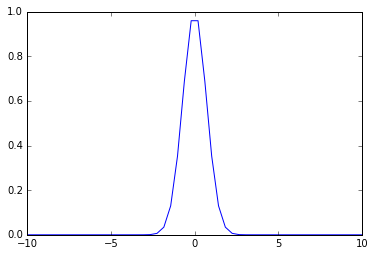

In [47]:
x_plot = np.linspace(-10, 10)
pl.figure()
pl.plot(x_plot, f10(x_plot))
pl.show()

E depois a transformação

$x = \tan \left[ \frac{\pi}{4} (1+y) \right]$

In [16]:
f3_2 = lambda y: f3(tan(pi/4 * (1+y)))
gauss_legendre_0inf(f3_2, xi, wi)

-259.08351264432883

#### Integral Duplo de ####

$\int _{0}^{1} \left( \int _{-\sqrt{1-y^{2}}} ^{\sqrt{1-y^{2}}} \, dx \right) dy$

In [17]:
f4 = lambda x: 1
f4_1 = lambda y: gauss_legendre_ab(f4, -(1-y**2)**(1/2), (1-y**2)**(1/2) , xi, wi)
gauss_legendre_ab(f4_1, 0, 1, xi, wi)

1.5708301878814022

#### Integral Duplo de ####

$\int _{0}^{1} \left( \int _{-\sqrt{1-y^{2}}} ^{\sqrt{1-y^{2}}} e^{-xy} \, dx \right) dy$

In [24]:
f5 = lambda x: e**(-x*y)
f5_1 = lambda y: gauss_legendre_ab(f5, -(1-y**2)**(1/2), (1-y**2)**(1/2), xi, wi)

In [28]:
gauss_legendre_ab(f5_1, 0, 1, xi, wi)

TypeError: 'Add' object is not iterable

Derivar $e^{x} \sin(x) + e^{-x} \cos(x)$ nos pontos x = 0, $\frac{\pi}{4}$, $\frac{\pi}{2}$, $\frac{3\pi}{4}$ e $\pi$.

Fórmulas a 2, 3 e 5 pontos.

h = 0.1, 0.05, 0.01

In [30]:
f6 = lambda x: exp(x)*sin(x) + exp(-x)*cos(x)
x_6 = [0, pi/4, pi/2, 3*pi/4, pi]
h_6 = [0.1, 0.05, 0.01]
fx_6 = list(map(f6, x_6))

In [33]:
def deriv2pts(yf, xf):
    df2pts = []
    for i in range(1, len(xf)):
        df2pts.append((yf[i] - yf[i-1]) / (xf[i] - xf[i-1]))
    return df2pts


def deriv3pts(yf, xf):
    df3pts = []


    return df3pts


def deriv5pts(yf, xf):
    df5pts = []


    return df5pts

In [34]:
print(deriv2pts(fx_6, x_6))
print(deriv3pts(fx_6, x_6))

[1.1118948064320076,
 3.7397556793319513,
 3.2887668178982699,
 -9.4686785180137765]